## Hypothesis

relation between historical events and genres of titles' popularity 

In [33]:
titles = read.delim('./../dataset/merge_basics_ratings_crew.tsv',header=TRUE)

In [5]:
europe_crisis = read.csv("./../dataset/Europe_crisis.csv")[,-1]

In [6]:
head(europe_crisis)

,CC3,Country,Year,Banking.Crisis,Systemic.Crisis,exch_usd,National.Currency,exch_sources,Domestic.Debt,Sovereign.External.debt1,Sovereign.External.debt2,GDP_Weighted_default,Inflation,Independence,Currency.Crises,Inflation.Crises
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,AUT,Austria,1800,0,0,NA,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 schilling, 1999-present euro",Primary source isGFD-RR_IFS official eop; alt1 series is GFD market eop exchange rate; alt2 series is Pick's parallel eop,0,0,0,0.00,14.646465,1,1,0
2,AUT,Austria,1801,0,0,NA,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 schilling, 1999-present euro",Primary source isGFD-RR_IFS official eop; alt1 series is GFD market eop exchange rate; alt2 series is Pick's parallel eop,0,0,0,0.00,29.240813,1,1,1
3,AUT,Austria,1802,0,0,NA,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 schilling, 1999-present euro",Primary source isGFD-RR_IFS official eop; alt1 series is GFD market eop exchange rate; alt2 series is Pick's parallel eop,0,1,1,0.86,11.554948,1,0,0
4,AUT,Austria,1803,0,0,NA,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 schilling, 1999-present euro",Primary source isGFD-RR_IFS official eop; alt1 series is GFD market eop exchange rate; alt2 series is Pick's parallel eop,0,1,1,0.86,12.448675,1,0,0
5,AUT,Austria,1804,0,0,NA,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 schilling, 1999-present euro",Primary source isGFD-RR_IFS official eop; alt1 series is GFD market eop exchange rate; alt2 series is Pick's parallel eop,0,1,1,0.86,-3.399989,1,1,0
6,AUT,Austria,1805,0,0,NA,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 schilling, 1999-present euro",Primary source isGFD-RR_IFS official eop; alt1 series is GFD market eop exchange rate; alt2 series is Pick's parallel eop,0,1,1,0.86,26.509581,1,0,1


In [39]:
t = titles
t$group_years = 0
head(t)

,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,averageRating,numVotes,n_directors,n_writers,group_years
,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>
1,tt0000001,short,0,1894,1,Documentary,Short,0,5.6,1654,1,1,0
2,tt0000002,short,0,1892,5,Animation,Short,0,6.1,199,1,1,0
3,tt0000003,short,0,1892,4,Animation,Comedy,Romance,6.5,1366,1,1,0
4,tt0000004,short,0,1892,12,Animation,Short,0,6.2,121,1,1,0
5,tt0000005,short,0,1893,1,Comedy,Short,0,6.2,2149,1,1,0
6,tt0000006,short,0,1894,1,Short,0,0,5.3,115,1,1,0


In [42]:
t[titles$startYear<1880, ]$group_years = "0_1880"
t[titles$startYear>=1880 & titles$startYear<1900, ]$group_years = "1880_1900"
t[titles$startYear>=1900 & titles$startYear<1920, ]$group_years = "1900_1920"
t[titles$startYear>=1920 & titles$startYear<1940, ]$group_years = "1920_1940"
t[titles$startYear>=1940 & titles$startYear<1960, ]$group_years = "1940_1960"
t[titles$startYear>=1960 & titles$startYear<1980, ]$group_years = "1960_1980"
t[titles$startYear>=1980 & titles$startYear<2000, ]$group_years = "1980_2000"
t[titles$startYear>=2000 & titles$startYear<2020, ]$group_years = "2000_2020"
t[titles$startYear>=2020 & titles$startYear<2040, ]$group_years = "2020_2040"

In [43]:
head(t)

,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,averageRating,numVotes,n_directors,n_writers,group_years
,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<chr>
1,tt0000001,short,0,1894,1,Documentary,Short,0,5.6,1654,1,1,1880_1900
2,tt0000002,short,0,1892,5,Animation,Short,0,6.1,199,1,1,1880_1900
3,tt0000003,short,0,1892,4,Animation,Comedy,Romance,6.5,1366,1,1,1880_1900
4,tt0000004,short,0,1892,12,Animation,Short,0,6.2,121,1,1,1880_1900
5,tt0000005,short,0,1893,1,Comedy,Short,0,6.2,2149,1,1,1880_1900
6,tt0000006,short,0,1894,1,Short,0,0,5.3,115,1,1,1880_1900


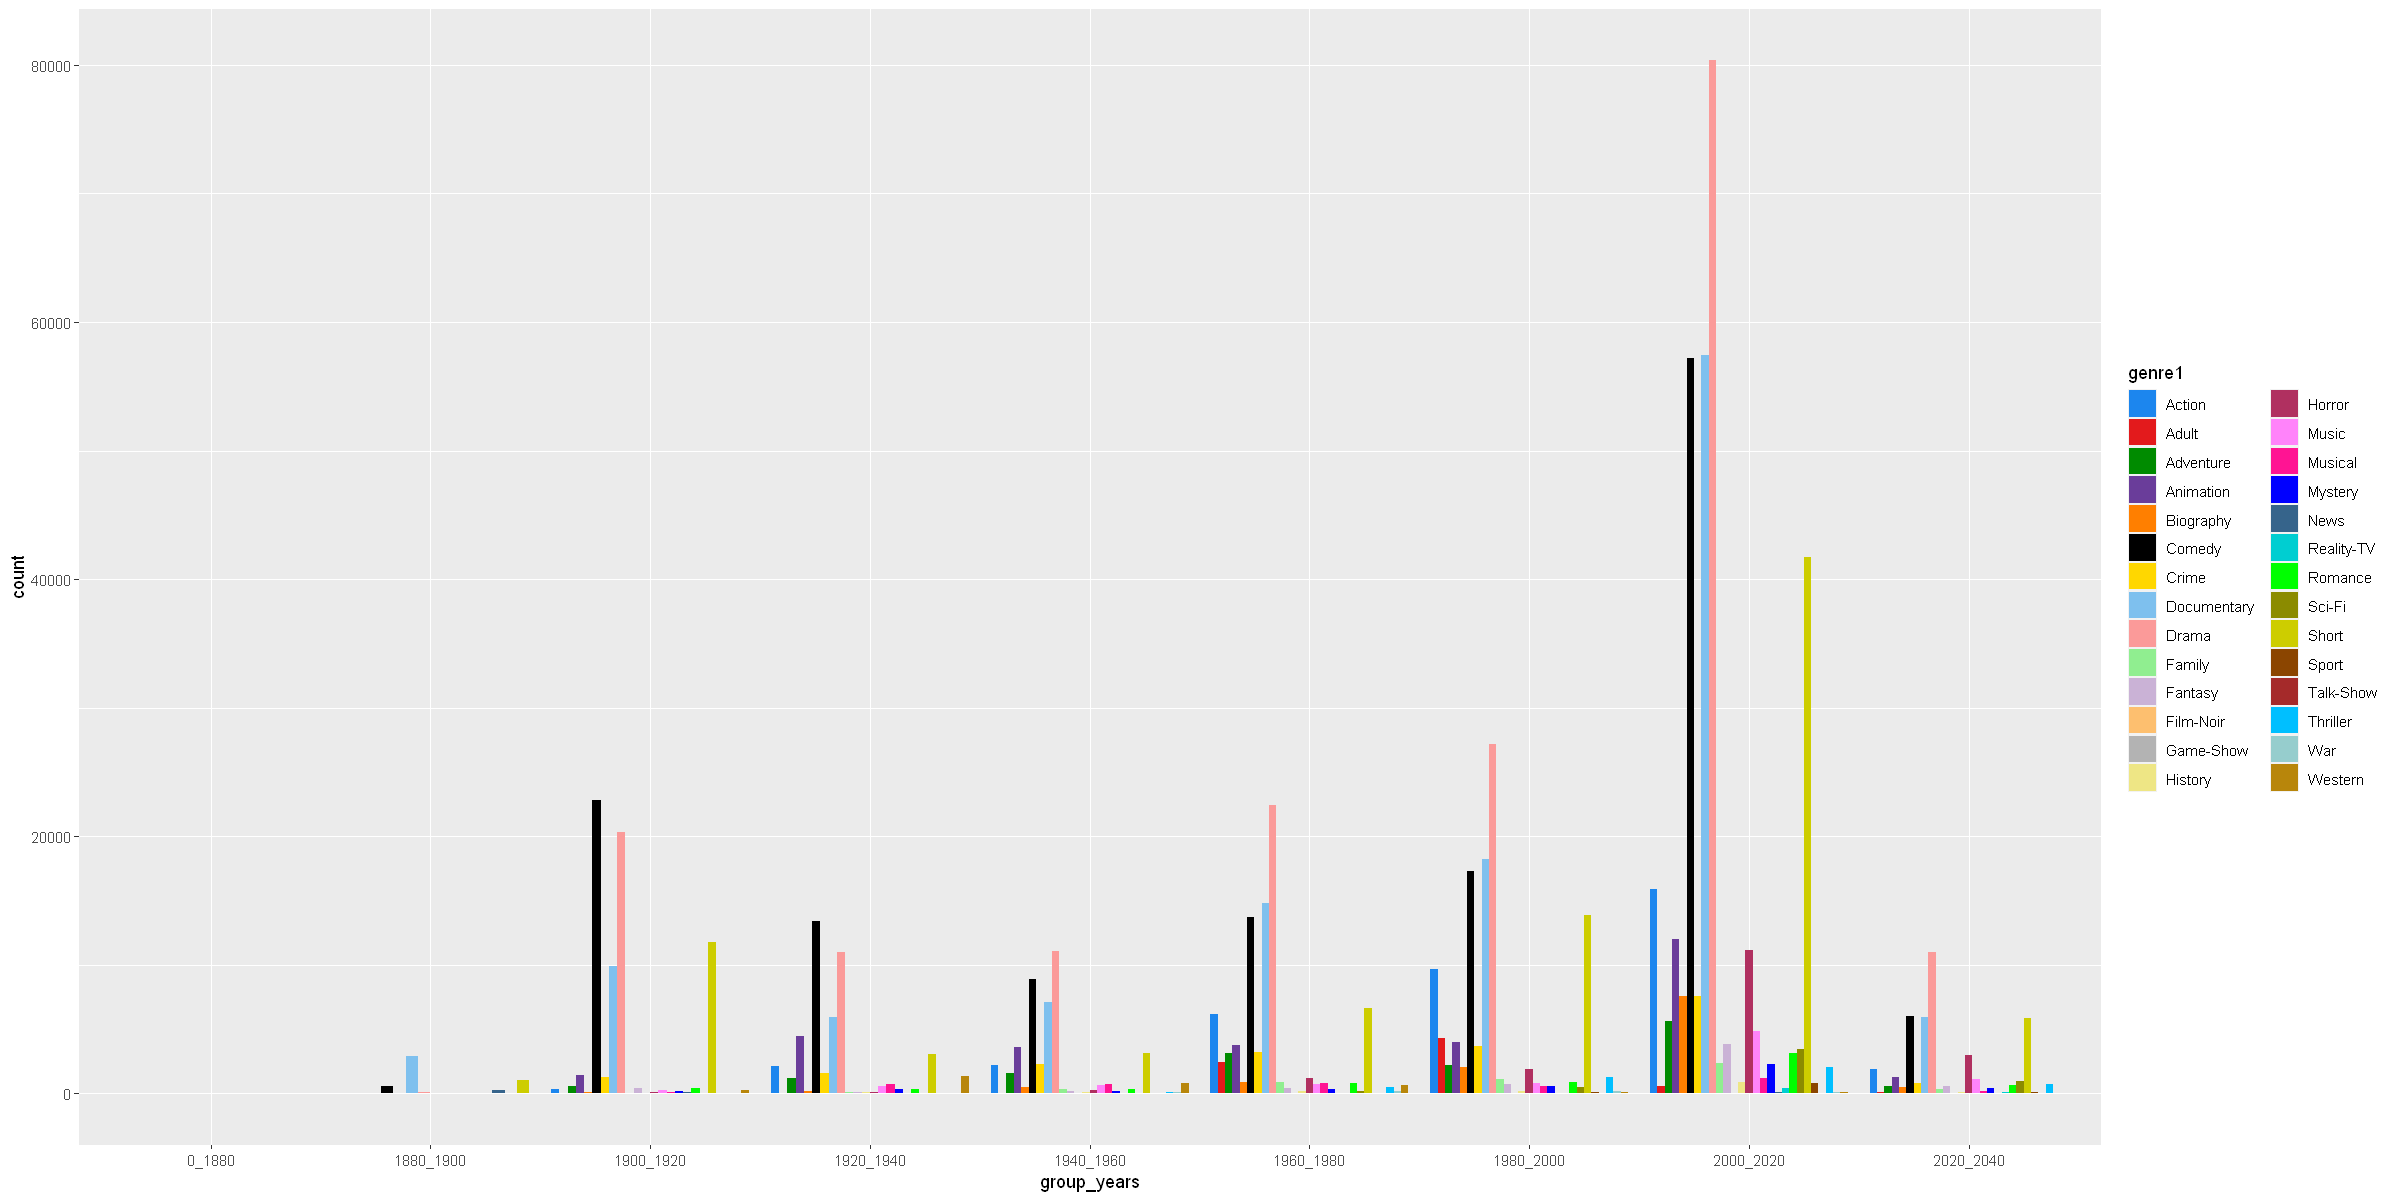

In [103]:
library("ggplot2")

options(repr.plot.width=20, repr.plot.height=10)

c28 = c(
  "dodgerblue2", "#E31A1C", # red
  "green4",
  "#6A3D9A", # purple
  "#FF7F00", # orange
  "black", "gold1",
  "skyblue2", "#FB9A99", # lt pink
  "palegreen2",
  "#CAB2D6", # lt purple
  "#FDBF6F", # lt orange
  "gray70", "khaki2",
  "maroon", "orchid1", "deeppink1", "blue1", "steelblue4",
  "darkturquoise", "green1", "yellow4", "yellow3",
  "darkorange4", "brown",
  "deepskyblue1", "paleturquoise3", "darkgoldenrod"
)

ggplot(t, aes(x=group_years, fill=genre1)) + 
    #geom_bar()+
    geom_bar(position="dodge") +
    scale_fill_manual(values=c28)

In [85]:
genre_groupyears = data.frame(genre=t$genre1, groupyear=t$group_years)

In [86]:
head(genre_groupyears)

,genre,groupyear
,<fct>,<fct>
1,Documentary,1880_1900
2,Animation,1880_1900
3,Animation,1880_1900
4,Animation,1880_1900
5,Comedy,1880_1900
6,Short,1880_1900


In [113]:
temp1 = data.frame(genre=t$genre1, year=t$startYear, group_years=t$group_years)
temp2 = data.frame(genre=t[t$genre2!=0,]$genre2, year=t[t$genre2!=0,]$startYear, group_years=t[t$genre2!=0,]$group_years )
temp3 = data.frame(genre=t[t$genre3!=0,]$genre3, year=t[t$genre3!=0,]$startYear, group_years=t[t$genre3!=0,]$group_years )
genres_years = rbind(temp1, temp2)
genres_years = rbind(genres_years, temp3)

In [114]:
head(genres_years)

,genre,year,group_years
,<fct>,<int>,<fct>
1,Documentary,1894,1880_1900
2,Animation,1892,1880_1900
3,Animation,1892,1880_1900
4,Animation,1892,1880_1900
5,Comedy,1893,1880_1900
6,Short,1894,1880_1900


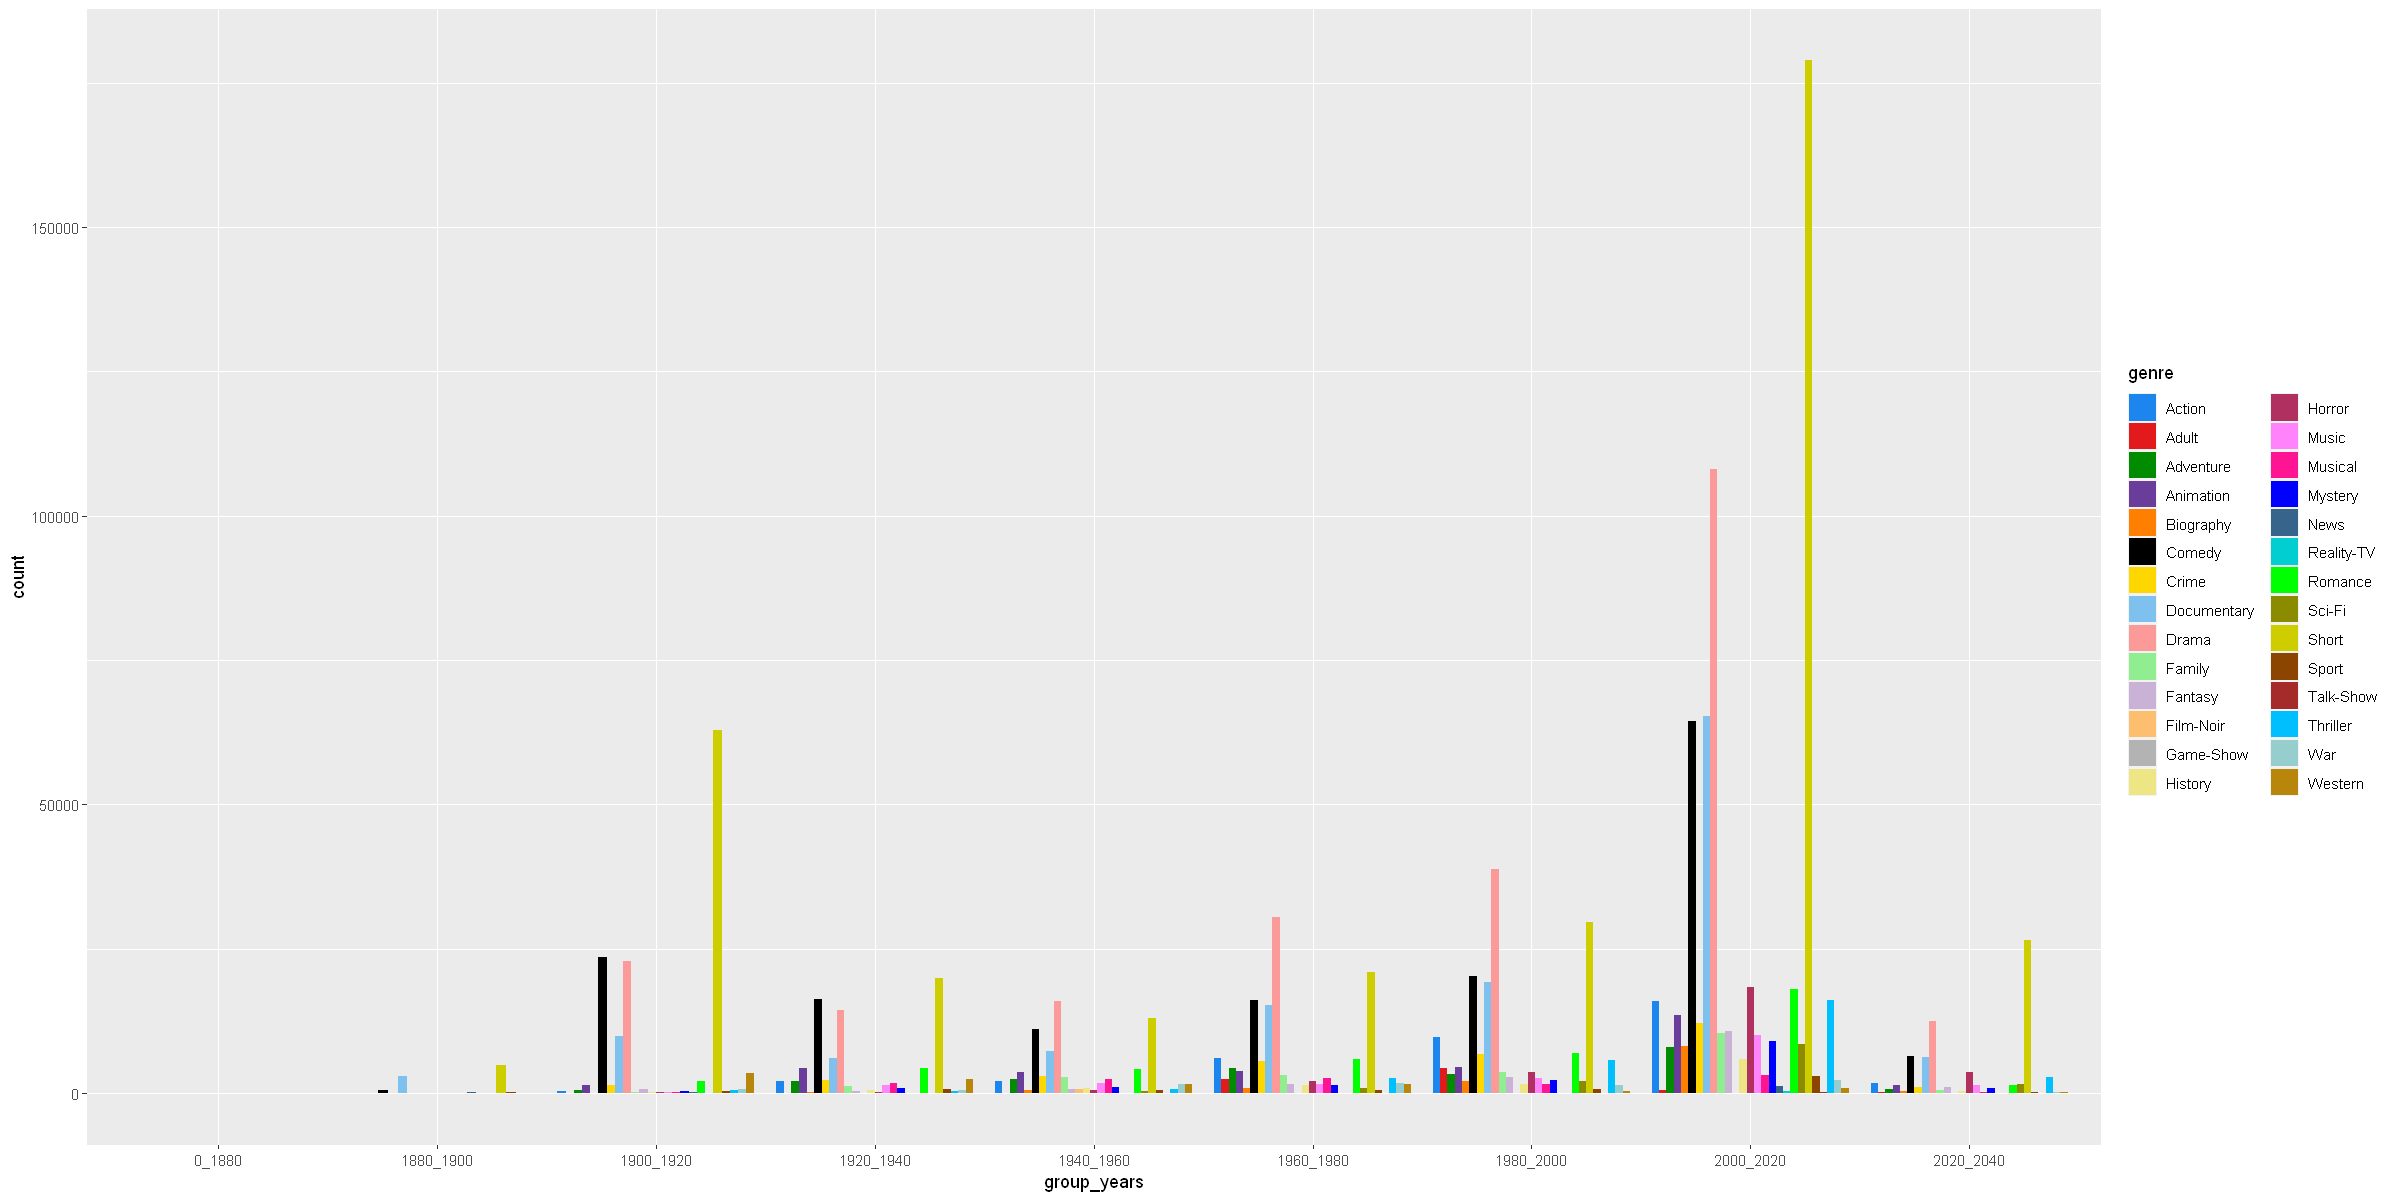

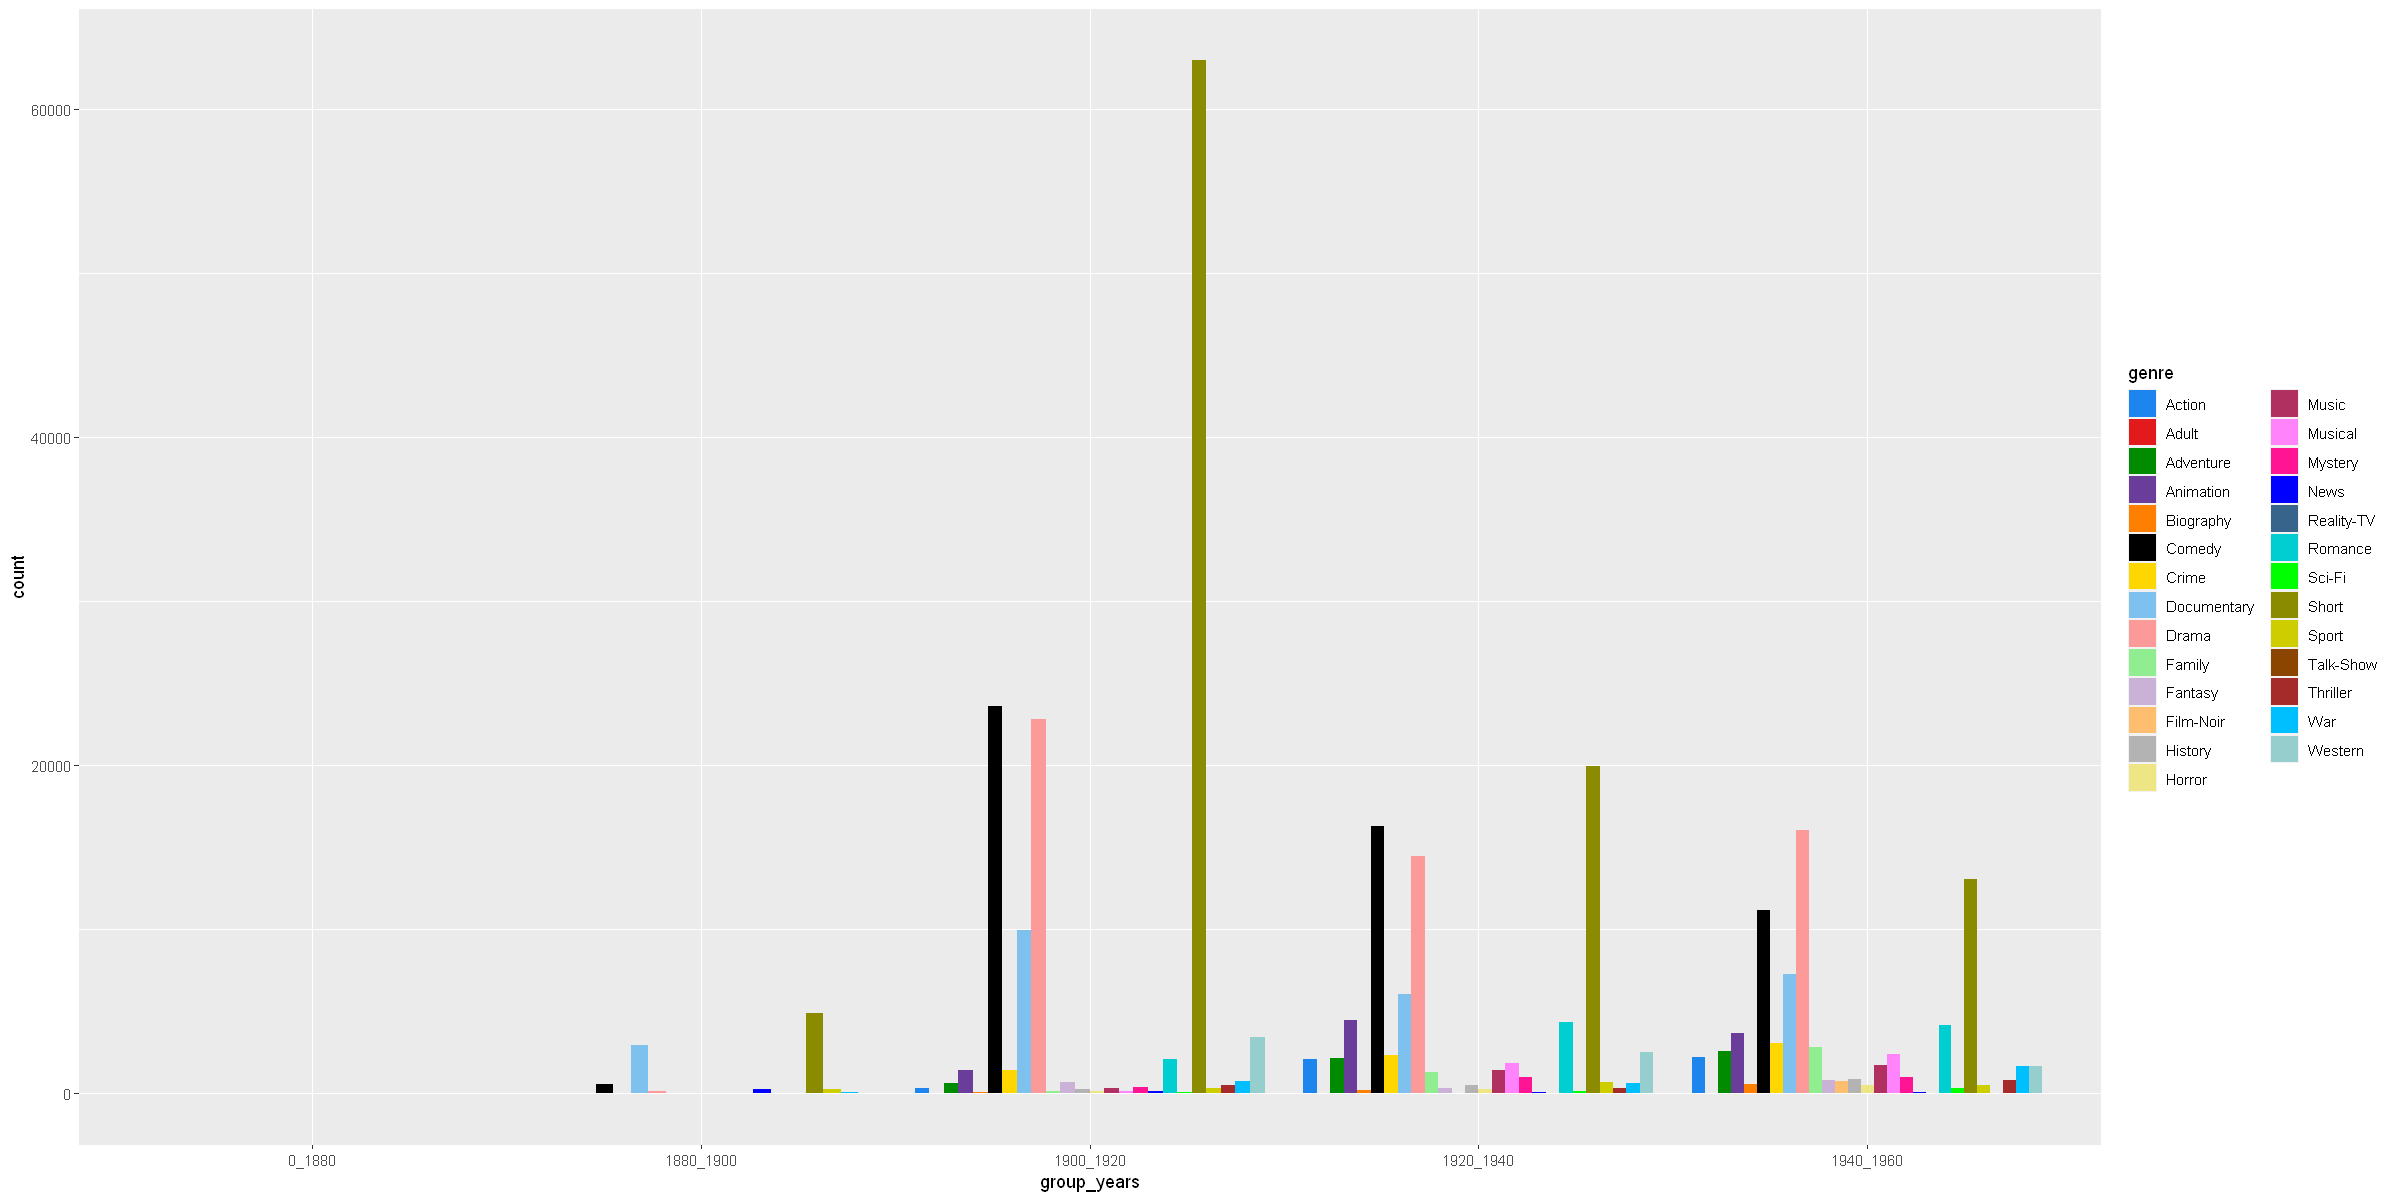

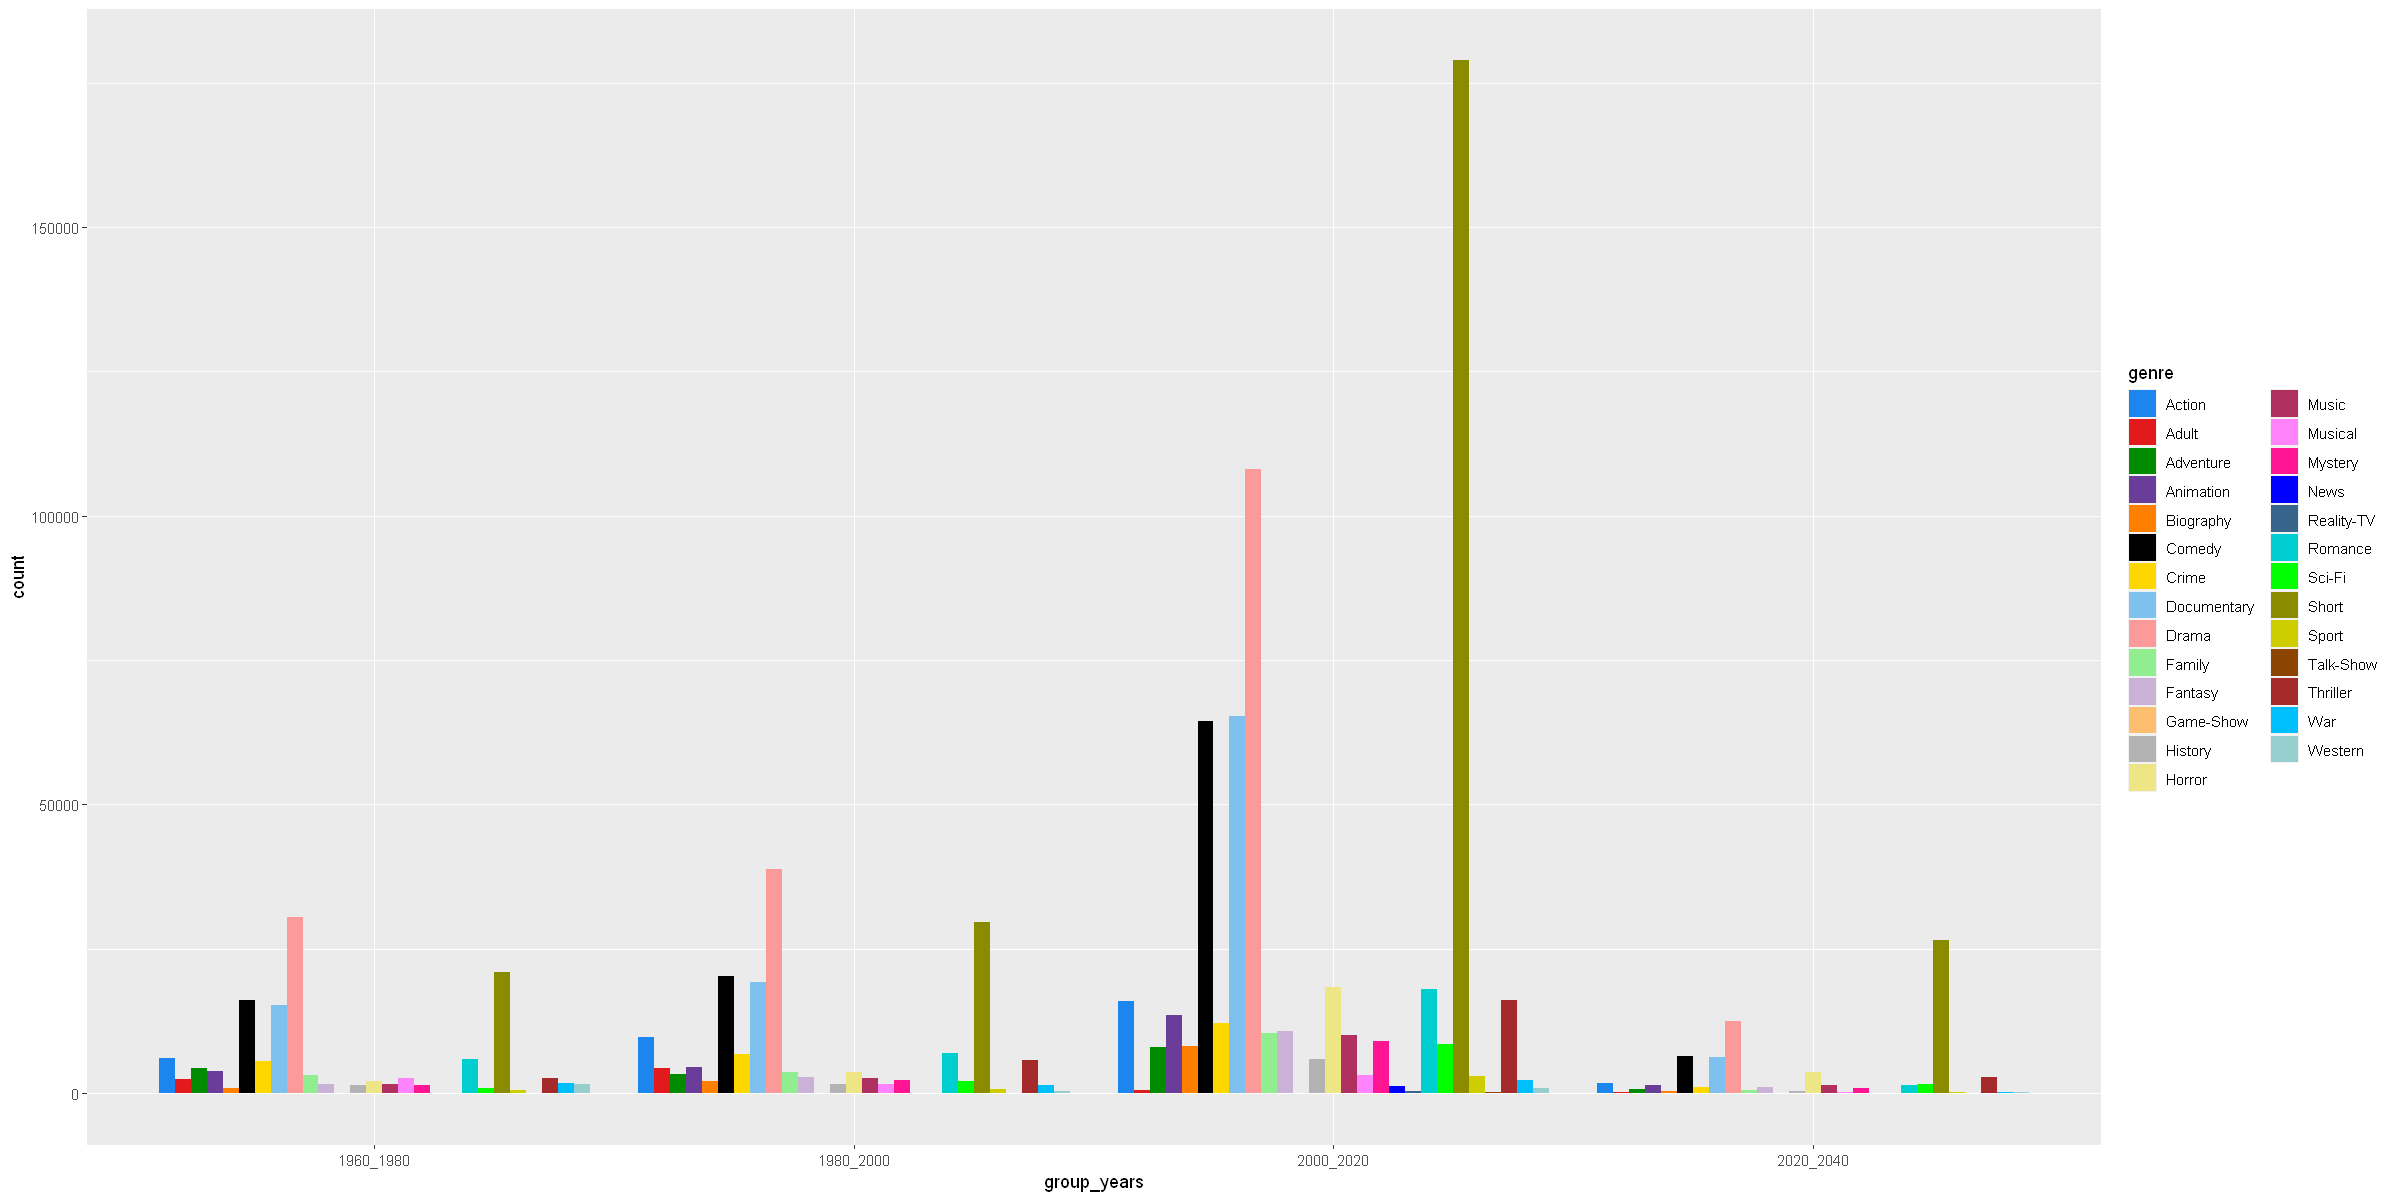

In [115]:
genres_until1960 = genres_years[genres_years$group_years %in% c("0_1880", "1880_1900", "1900_1920", "1920_1940", "1940_1960"),]
genres_after1960 = genres_years[!genres_years$group_years %in% c("0_1880", "1880_1900", "1900_1920", "1920_1940", "1940_1960"),]

ggplot(genres_years, aes(x=group_years, fill=genre)) + 
    #geom_bar()+
    geom_bar(position="dodge") +
    scale_fill_manual(values=c28)

ggplot(genres_until1960, aes(x=group_years, fill=genre)) + 
    #geom_bar()+
    geom_bar(position="dodge") +
    scale_fill_manual(values=c28)

ggplot(genres_after1960, aes(x=group_years, fill=genre)) + 
    #geom_bar()+
    geom_bar(position="dodge") +
    scale_fill_manual(values=c28)

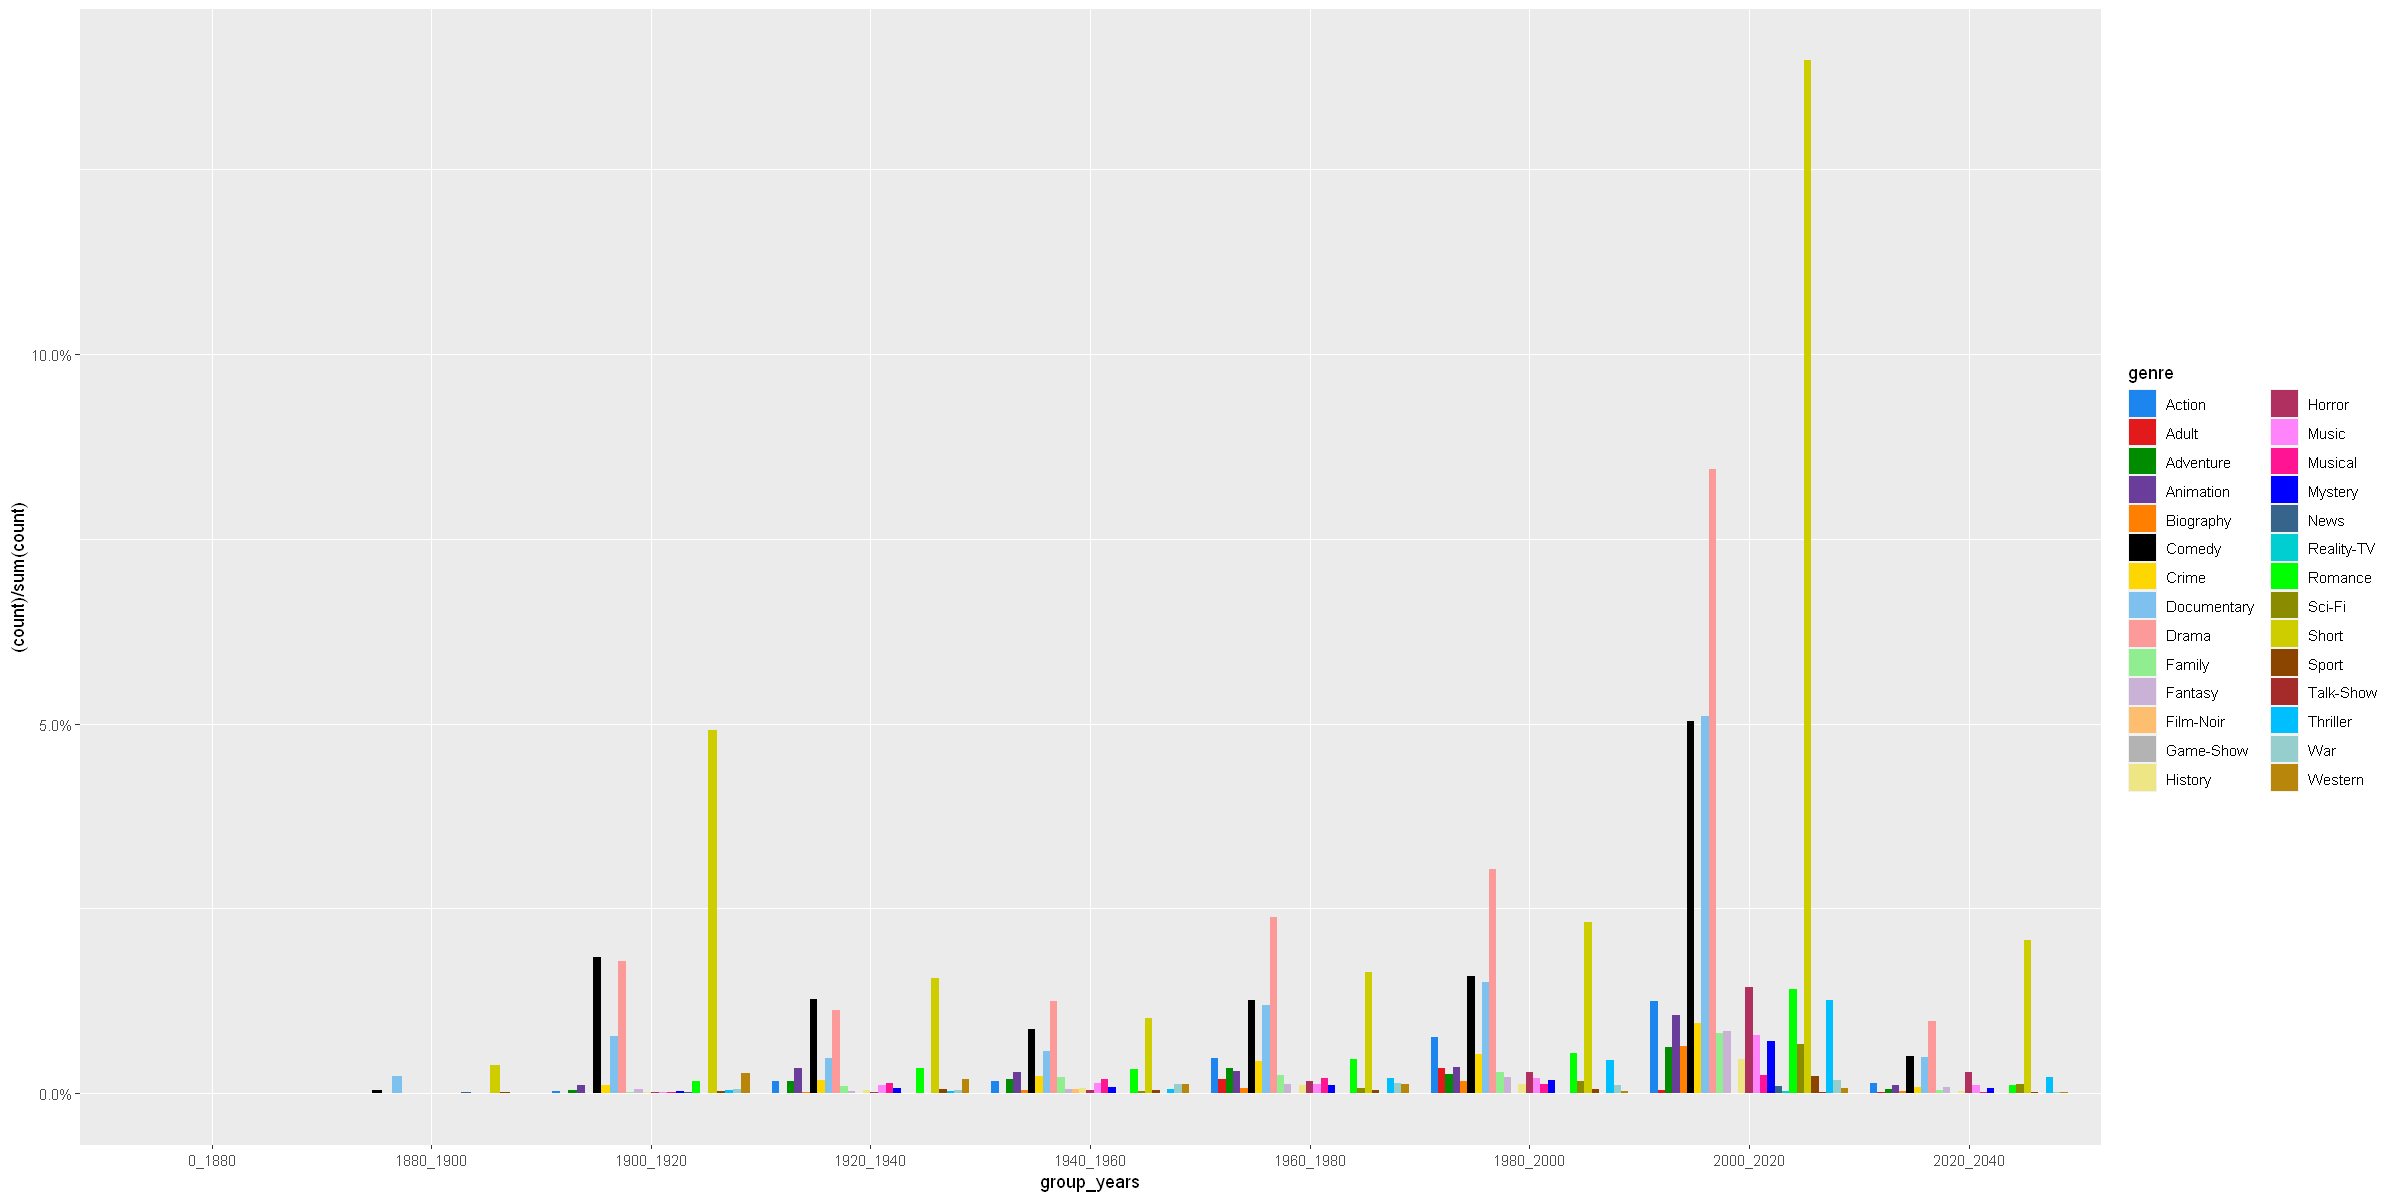

In [116]:
ggplot(genres_years, aes(x=group_years, fill=genre)) + 
    geom_bar(aes(y = (..count..)/sum(..count..)), position="dodge") +
    scale_fill_manual(values=c28) + 
    scale_y_continuous(labels=scales::percent)

In [120]:
unique(genres_years$genre)

[1] Documentary Animation   Comedy      Short       Romance     Action     
 [7] News        Drama       Fantasy     Horror      Biography   Music      
[13] Crime       Family      Adventure   History     Mystery     Musical    
[19] War         Sci-Fi      Western     Thriller    Sport       Film-Noir  
[25] Adult       Game-Show   Reality-TV  Talk-Show  
29 Levels: Action Adult Adventure Animation Biography Comedy ... 0

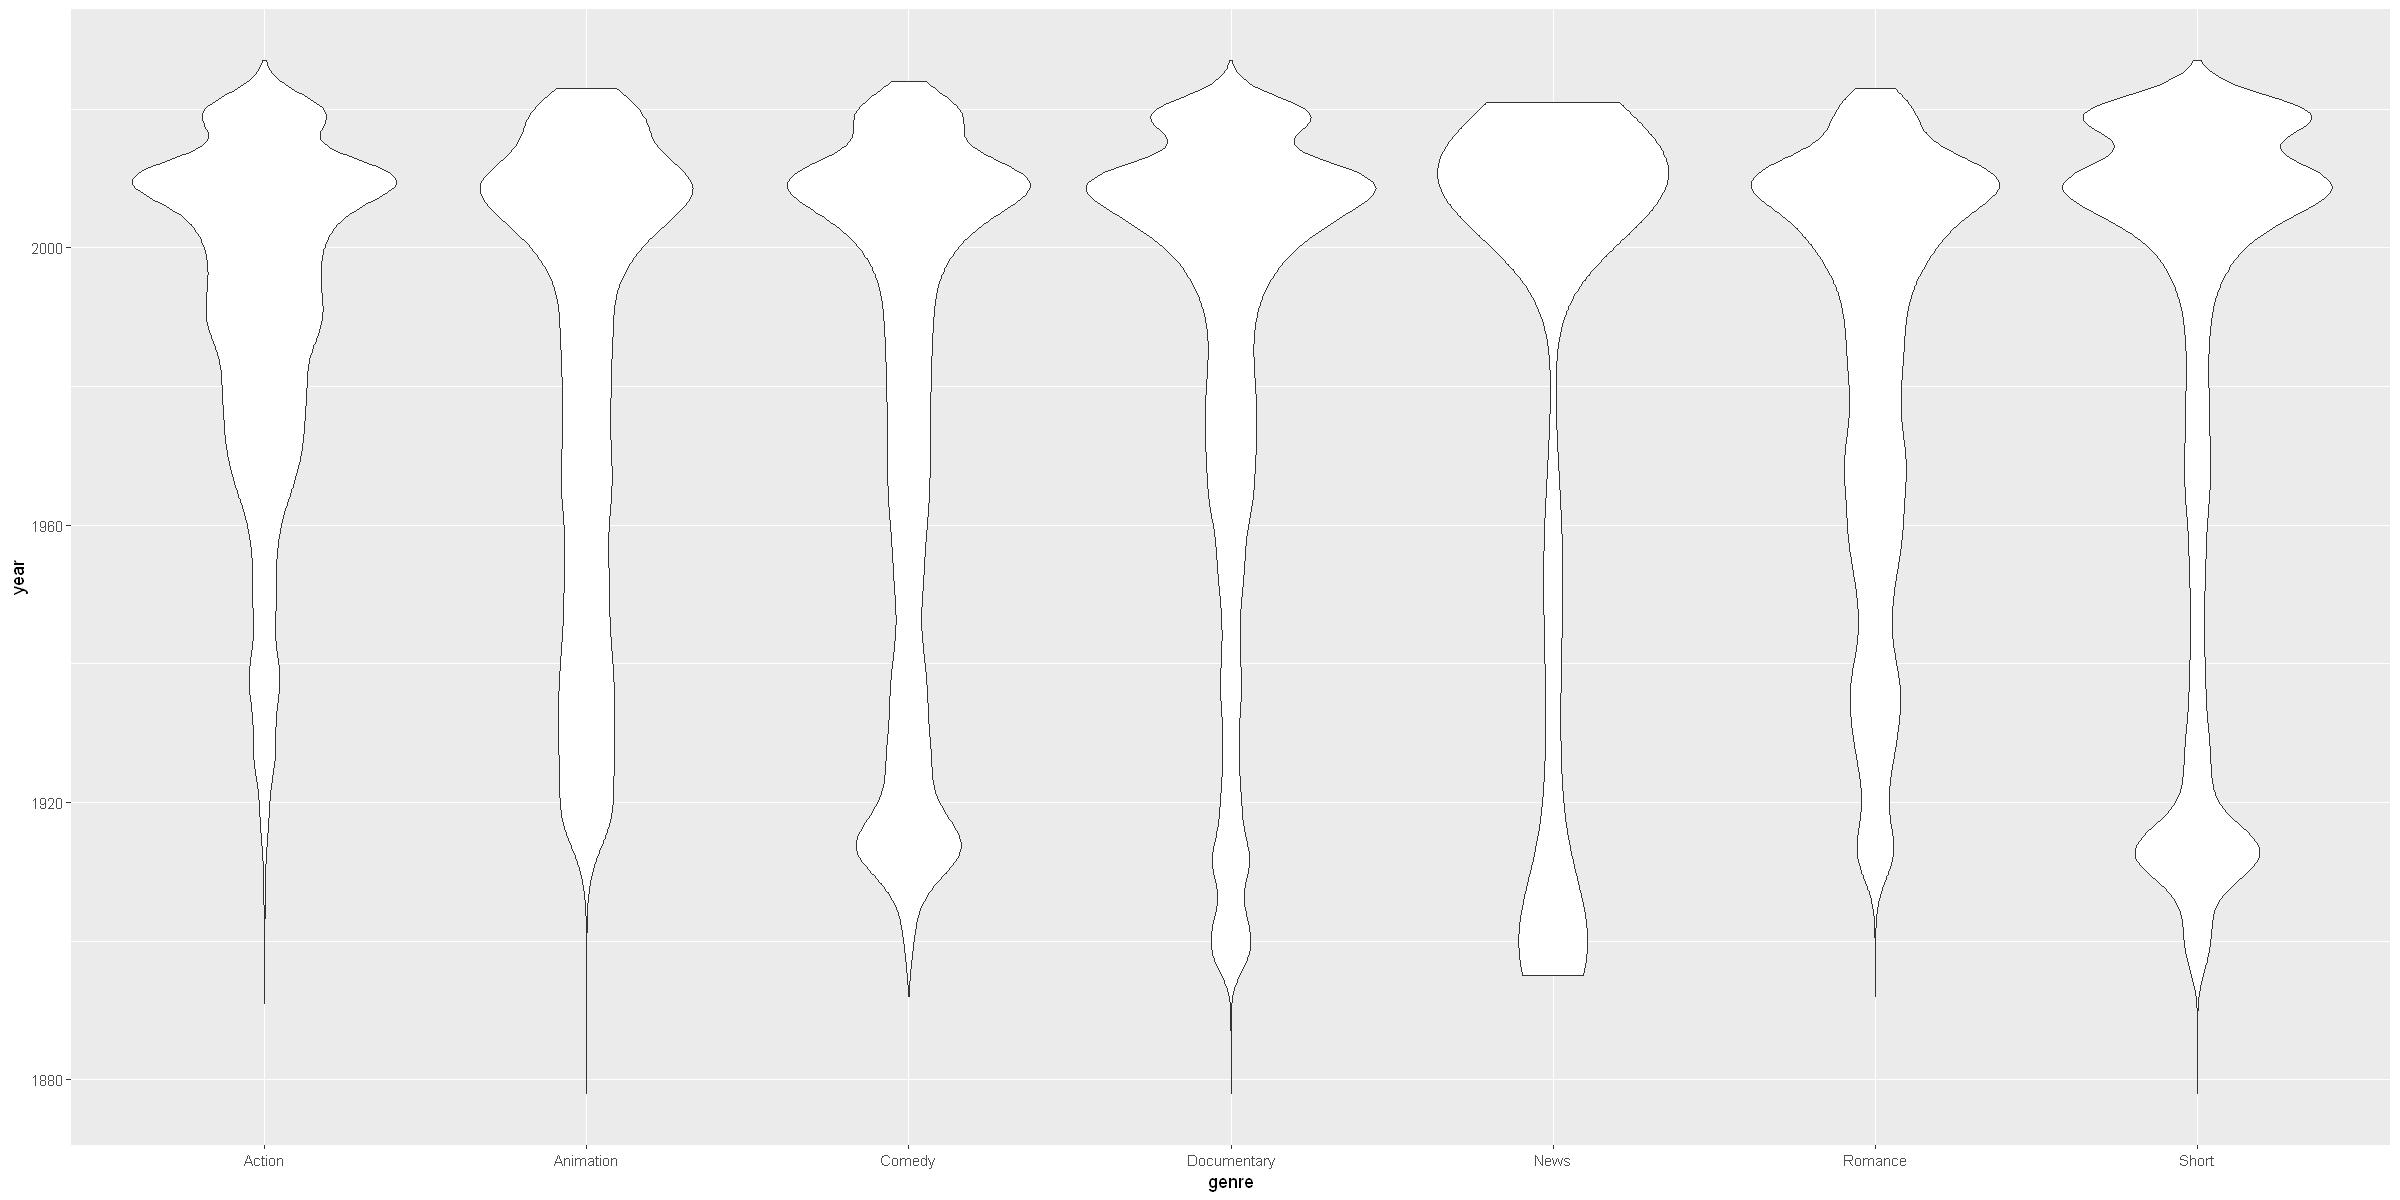

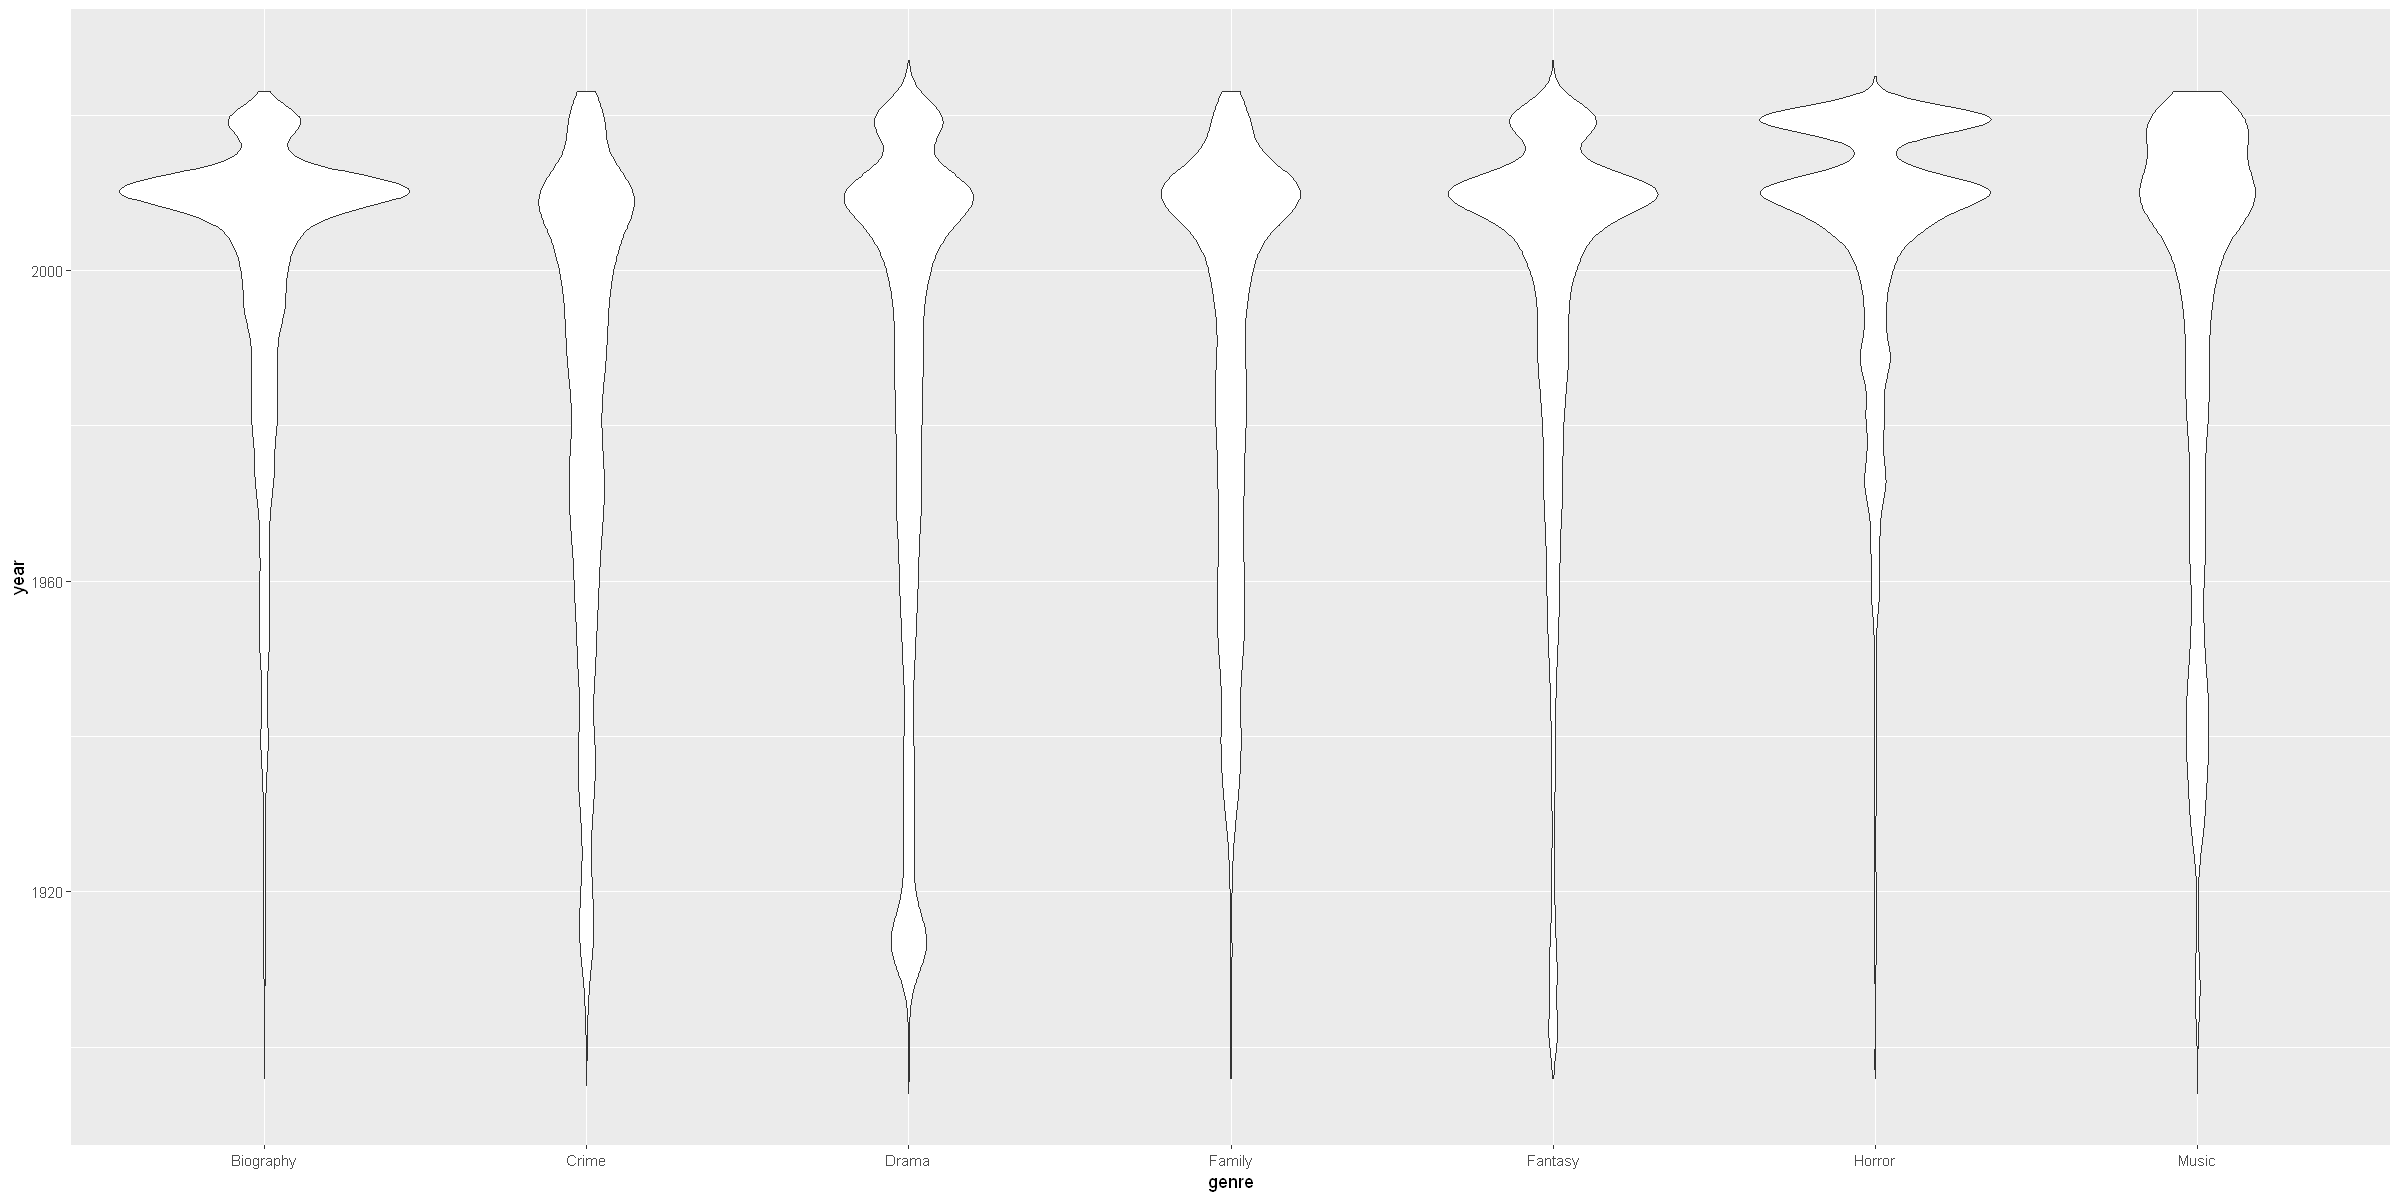

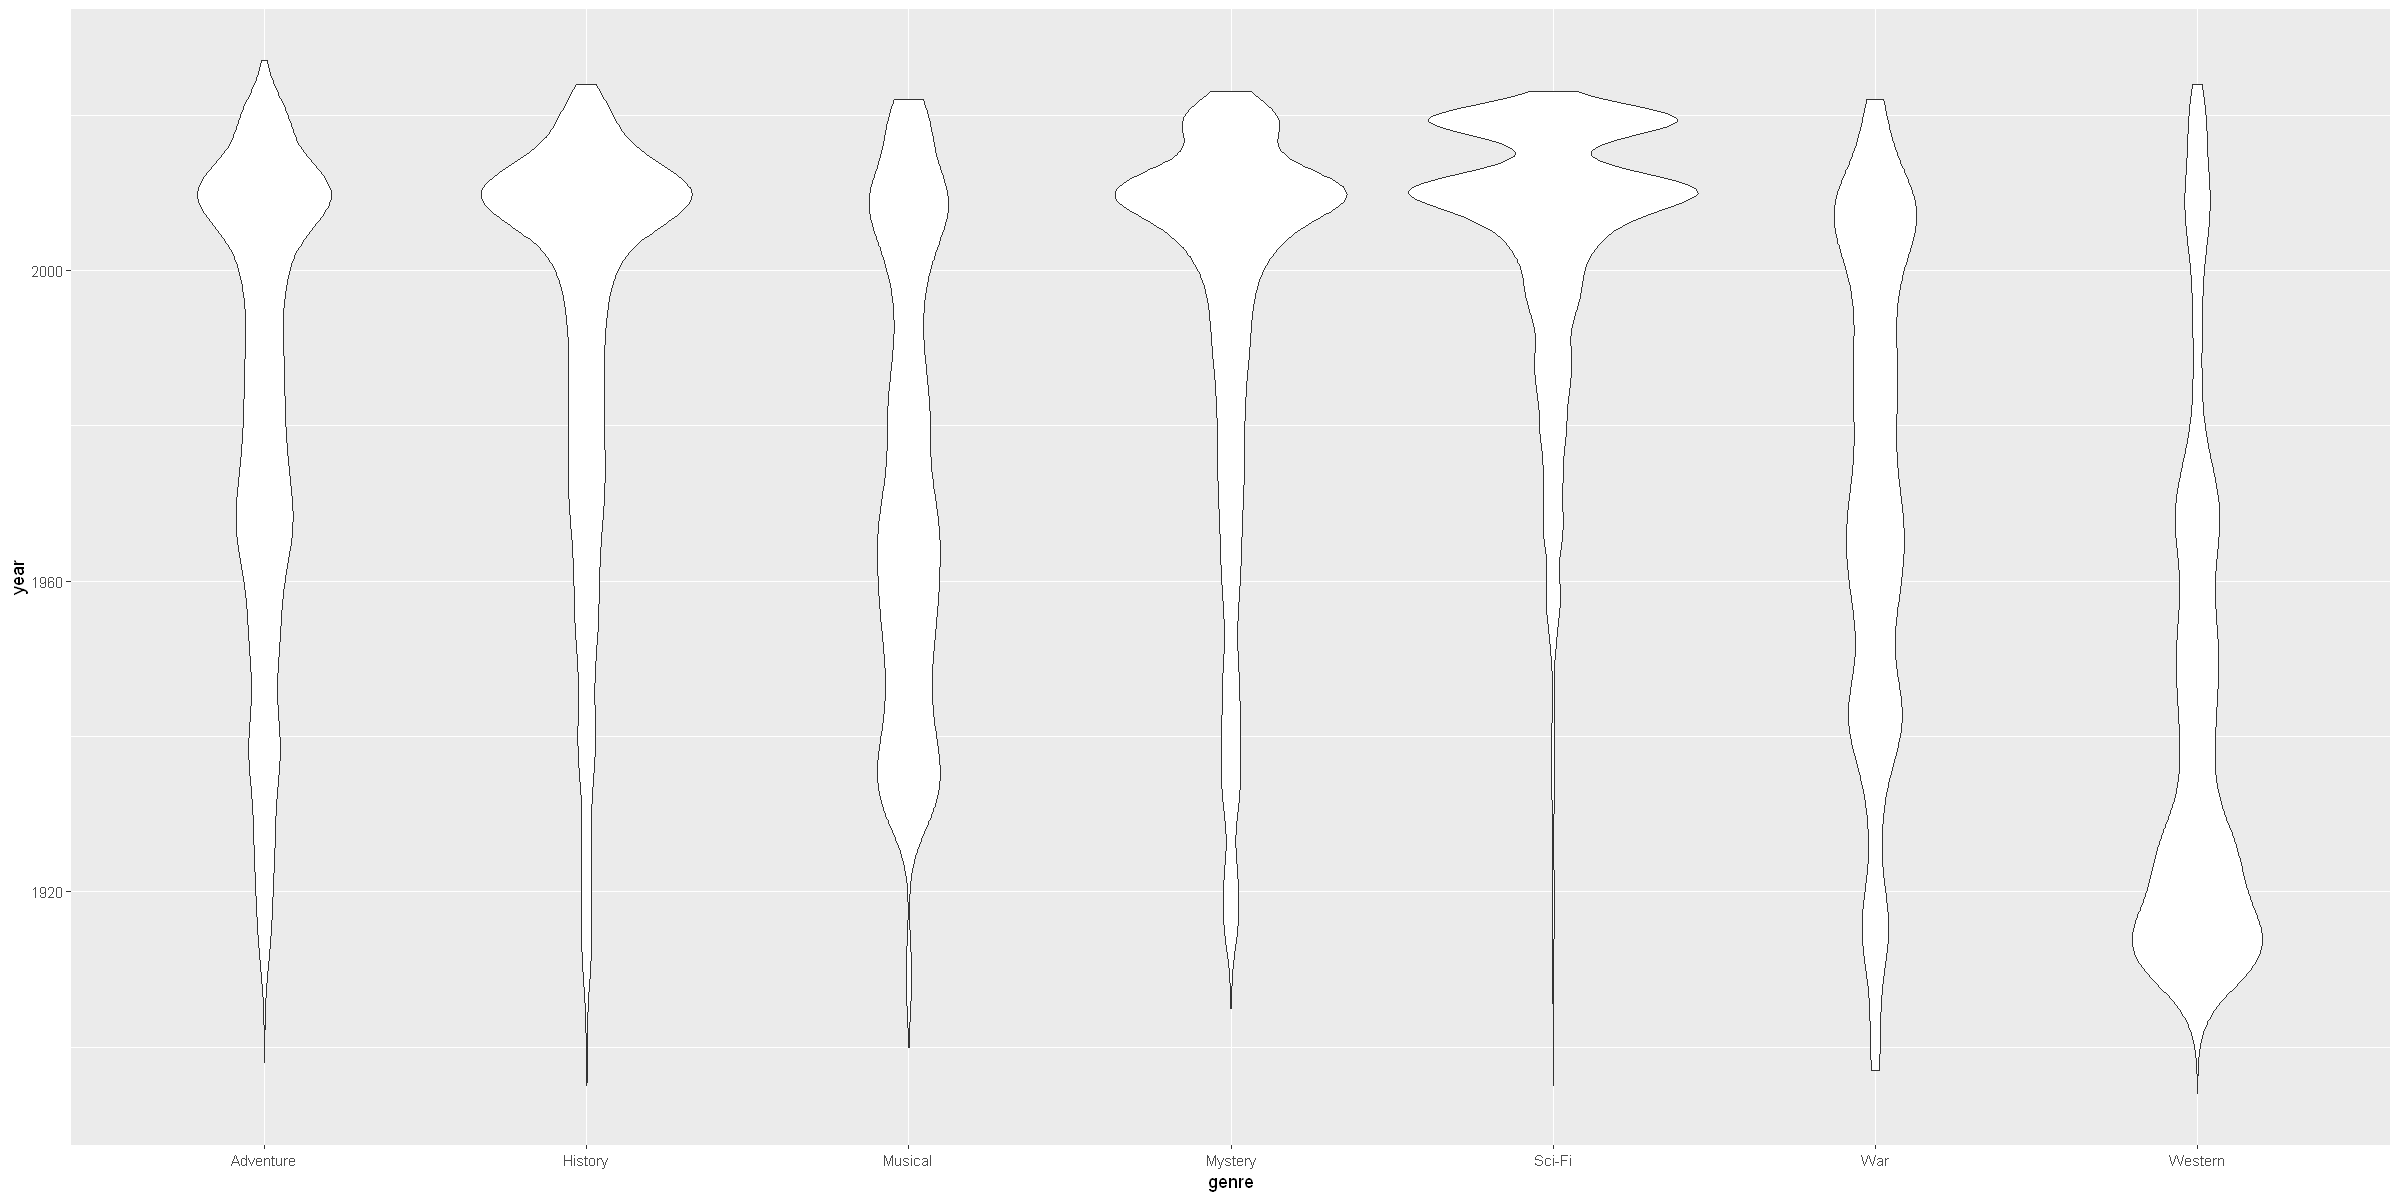

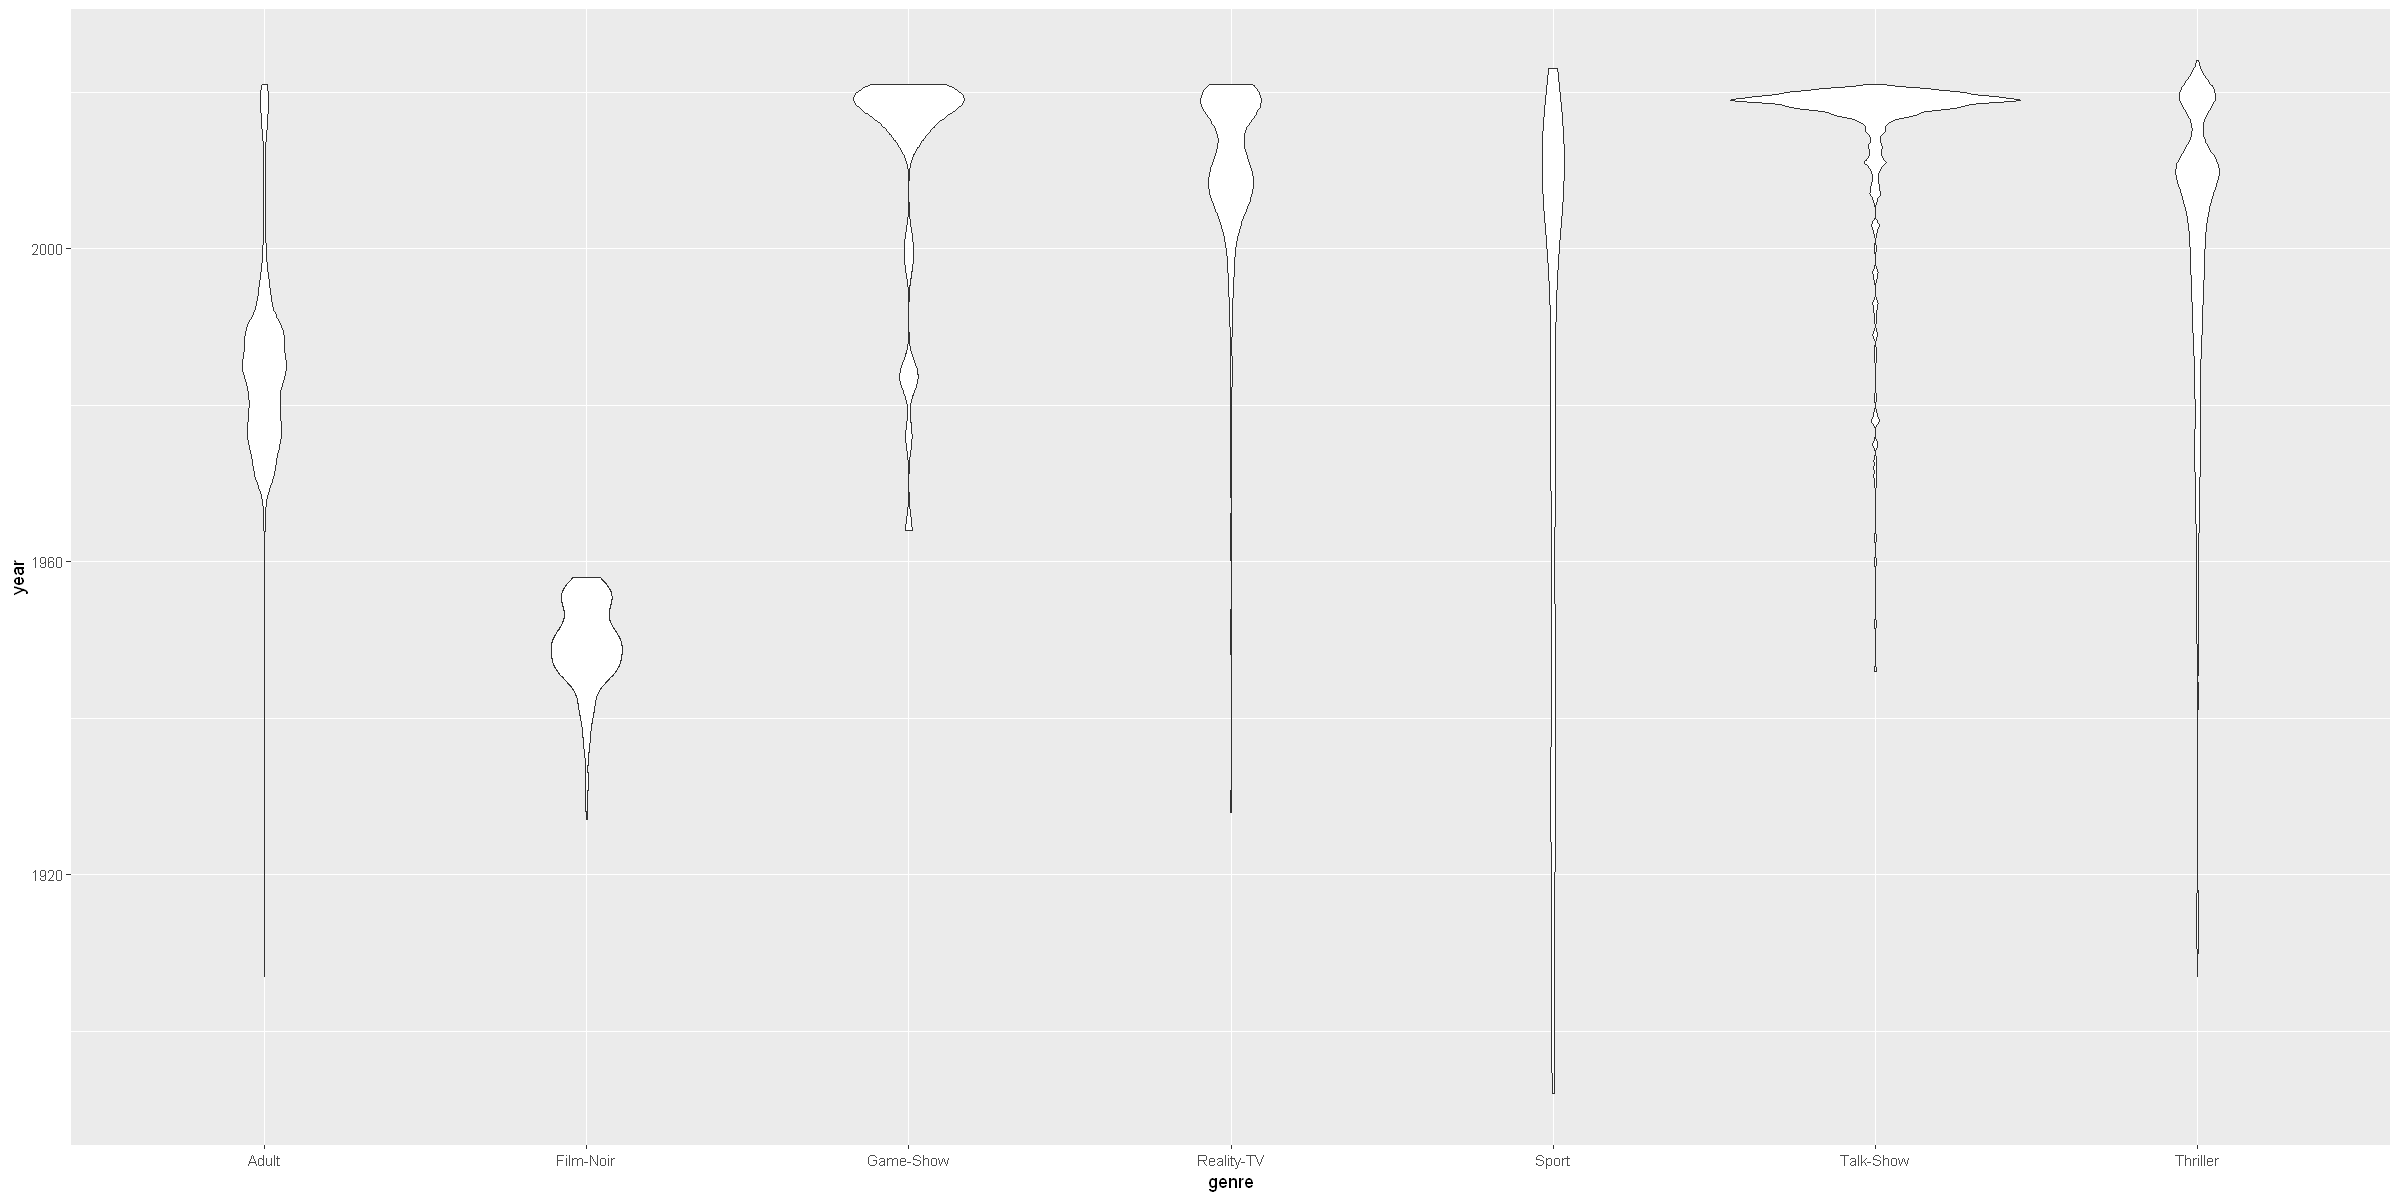

In [122]:
temp1 = genres_years[genres_years$genre %in% c("Documentary", "Animation", "Comedy", "Short", "Romance", "Action", "News"),]
temp2 = genres_years[genres_years$genre %in% c("Drama", "Fantasy", "Horror", "Biography", "Music", "Crime", "Family"),]
temp3 = genres_years[genres_years$genre %in% c("Adventure", "History", "Mystery", "Musical", "War", "Sci-Fi", "Western"),]
temp4 = genres_years[genres_years$genre %in% c("Thriller", "Sport", "Film-Noir", "Adult", "Game-Show", "Reality-TV", "Talk-Show"),]

ggplot(temp1, aes(x=genre, y=year)) + 
    geom_violin() 

ggplot(temp2, aes(x=genre, y=year)) + 
    geom_violin() 

ggplot(temp3, aes(x=genre, y=year)) + 
    geom_violin() 

ggplot(temp4, aes(x=genre, y=year)) + 
    geom_violin() 